In [1]:
import pandas as pd

In [2]:
feature_name_df = pd.read_csv('./data/human_activity_features.txt'
                              ,sep='\s+'
                              ,header=None
                              ,names=["column_index","column_name"])

In [3]:
feature_name = feature_name_df.iloc[ : , 1].values.tolist()

In [4]:
X_train = pd.read_csv('./data/human_activity_X_train.txt'
                      ,header=None
                      ,sep='\s+'
                     )

In [5]:
X_train.columns = feature_name

In [6]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [7]:
X_test = pd.read_csv('./data/human_activity_X_test.txt'
            ,sep='\s+'
            ,header=None
             )

In [8]:
X_test.columns = feature_name

In [9]:
y_train = pd.read_csv('./data/human_activity_y_train.txt'
                      ,sep = '\s+'
                      ,header = None
                      ,names = ["action"]
                     )

In [10]:
y_test = pd.read_csv('./data/human_activity_y_test.txt'
                     ,sep = '\s+'
                     ,header = None
                     ,names = ["action"]
                    )

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf_clf = RandomForestClassifier()

In [13]:
rf_clf.fit(X_train, y_train)

c:\programdata\anaconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [14]:
pred = rf_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, pred)

0.9239904988123515

In [17]:
params = {
    "n_estimators":[100],
    "max_depth":[6, 8, 10, 12],
    "min_samples_leaf":[8, 12, 18],
    "min_samples_split":[8,16, 20]
}

In [18]:
rf_clf = RandomForestClassifier(n_jobs=10)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
import warnings
warnings.filterwarnings(action='ignore') 

In [21]:
GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=10), n_jobs=10,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [22]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, n_jobs=10)

In [23]:
grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=10), n_jobs=10,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [24]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [25]:
grid_cv.best_score_

0.9262836609830879

In [26]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=10)

In [27]:
best_random_forest = grid_cv.best_estimator_

In [30]:
best_predict = best_random_forest.predict(X_test)

In [31]:
accuracy_score(y_test, best_predict)

0.9212758737699356

In [41]:
ftr_importances_values = best_random_forest.feature_importances_

In [42]:
ftr_importances = pd.Series(ftr_importances_values , index=feature_name )

In [43]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[ : 20]

In [44]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [46]:
plt.style.use("ggplot")

<AxesSubplot:title={'center':'Feature Importance Top 20'}>

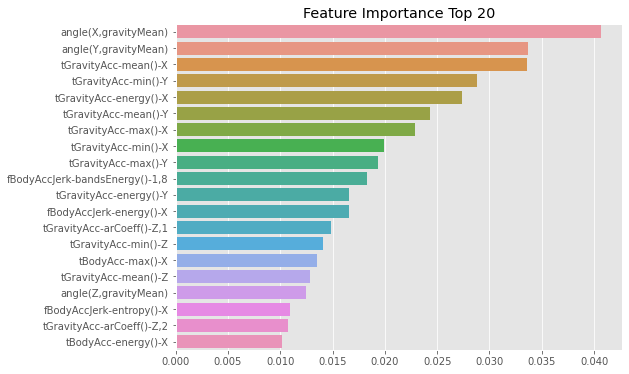

In [48]:
plt.figure(figsize=(8,6))
plt.title("Feature Importance Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)